### 1.1.1.2.	(20 points) Effect of systematic training - the script trains the network by going through 100 thousand data samples one by one in a random manner:

#### Submitted by:
#### Aradhya Mathur
#### Lakshmi Nikhil Goduguluri
for iter in range(1, n_iters + 1):
category, name, category_tensor, name_tensor = randomTrainingExample()
output, loss =train(category_tensor,name_tensor) current_loss += loss

The network parameters are updated by backpropagating losses computed on a per-sample basis. Also note that the there is only 1 training epoch in the example provided. 

Modify the script so that, instead of picking each training sample randomly, it goes through every available sample exactly once per training epoch. Randomize the order of the samples within each epoch. Train the network for five epochs, and report results as you change the hidden state size as in Problem 1.1 above. Note that, since the dataset comprises around 20000 datapoints, the total number of data passes for this modified training process are like those required by Problem 1.1. 

What is the accuracy thus trained and evaluated for the different values of hidden state size (2,8,32)?  Also, include a graph of the loss function and the confusion matrix for each case. 
k, and report the average accuracy.


In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

print('hello')

def findFiles(path): return glob.glob(path)

#print(findFiles('C:/Users/*.txt'))

# %% 

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# %%
# Build the names dictionary, a list of names per language
# di tionary keys are languages, values are names
names = {}
languages = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# PLEASE UPDATE THE FILE PATH BELOW FOR YOUR SYSTEM
for filename in findFiles(r"C:\Users\aradh\Desktop\Fall 22\TSA\Project 3.1\data\data\names\*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0]
    languages.append(category)
    lines = readLines(filename)
    names[category] = lines

n_categories = len(languages)

def findName(dict, name):
    keys = dict.keys()
    for key in keys:
        if name in dict[key]:
            return key
    return ''

findName(names,'Bernal')
findName(names,'Johnson')

# Now we have ``names``, a dictionary mapping each category
# (language) to a list of lines (names). We also kept track of
# ``languages`` (just a list of languages) and ``n_categories`` for
# later reference.
# 

print(names['Italian'][:5])

# %% 
# Turning Names into Tensors
# --------------------------
# 
# Now that we have all the names organized, we need to turn them into
# Tensors to make any use of them.
# 
# To represent a single letter, we use a "one-hot vector" of size
# ``<1 x n_letters>``. A one-hot vector is filled with 0s except for a 1
# at index of the current letter, e.g. ``"b" = <0 1 0 0 0 ...>``.
# 
# To make a word we join a bunch of those into a 2D matrix
# ``<line_length x 1 x n_letters>``.
# 
# That extra 1 dimension is because PyTorch assumes everything is in
# batches - we're just using a batch size of 1 here.

import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    for li, letter in enumerate(name):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(nameToTensor('Jones').size())


# %% Creating the Network
# ====================
# 
# Before autograd, creating a recurrent neural network in Torch involved
# cloning the parameters of a layer over several timesteps. The layers
# held hidden state and gradients which are now entirely handled by the
# graph itself. This means you can implement a RNN in a very "pure" way,
# as regular feed-forward layers.
# 
# This RNN module (mostly copied from `the PyTorch for Torch users
# tutorial <https://pytorch.org/tutorials/beginner/former_torchies/
# nn_tutorial.html#example-2-recurrent-net>`__)
# is just 2 linear layers which operate on an input and hidden state, with
# a LogSoftmax layer after the output.
# 
# .. figure:: https://i.imgur.com/Z2xbySO.png
#    :alt:


hello
Slusarski
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [2]:
print(letterToTensor('A'))
print(('Line Gap'))
print(nameToTensor('Aradhya'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
Line Gap
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0

# Hidden Layer = 2

tensor([[-2.8722, -2.7541, -2.8250, -2.7869, -3.1071, -2.7526, -2.8995, -2.8031,
         -2.8916, -2.9562, -2.8060, -2.8550, -2.8952, -3.1110, -2.8818, -2.9039,
         -3.0018, -3.0202]], grad_fn=<LogSoftmaxBackward0>)
('French', 5)
category = Portuguese / name = Santos
category = Vietnamese / name = Do
category = Scottish / name = Cunningham
category = French / name = Deniaud
category = Scottish / name = Munro
category = Czech / name = Kocian
category = Italian / name = Airaldi
category = Dutch / name = Amstel
category = Greek / name = Dasios
category = Portuguese / name = Silva


C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\3270444319.py:131: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\python_arg_parser.cpp:1420.)
  p.data.add_(-learning_rate, p.grad.data)


5000 5% (0m 5s) 0.3490 Diev / Russian ✓
10000 10% (0m 10s) 0.1034 Zhitinkin / Russian ✓
15000 15% (0m 15s) 2.8968 Svocak / Russian ✗ (Czech)
20000 20% (0m 20s) 4.1947 Reynder / Russian ✗ (Dutch)
25000 25% (0m 25s) 1.3866 Ganim / Arabic ✓
30000 30% (0m 31s) 4.3100 Crawford / English ✗ (Scottish)
35000 35% (0m 35s) 0.1989 Jitin / Russian ✓
40000 40% (0m 40s) 0.6536 Fallon / English ✓
45000 45% (0m 45s) 0.0426 Abidov / Russian ✓
50000 50% (0m 50s) 0.0546 Awerochkin / Russian ✓
55000 55% (0m 55s) 0.0311 Schirovsky / Russian ✓
60000 60% (1m 0s) 1.3622 Michael / English ✓
65000 65% (1m 5s) 5.2389 Di pasqua / Japanese ✗ (Italian)
70000 70% (1m 10s) 0.7776 Khoury / Arabic ✓
75000 75% (1m 15s) 2.1044 Chepraga / Japanese ✗ (Russian)
80000 80% (1m 20s) 4.0335 Lim / English ✗ (Chinese)
85000 85% (1m 25s) 1.1717 Tresler / English ✗ (German)
90000 90% (1m 30s) 4.1458 Sienkiewicz / Russian ✗ (Polish)
95000 95% (1m 36s) 3.7940 De laurentis / English ✗ (Italian)
100000 100% (1m 41s) 0.0810 Zolotavin / 

C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\3270444319.py:266: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + languages, rotation=90)
C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\3270444319.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + languages)


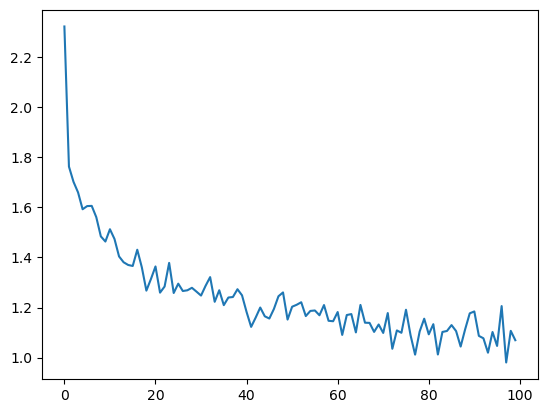

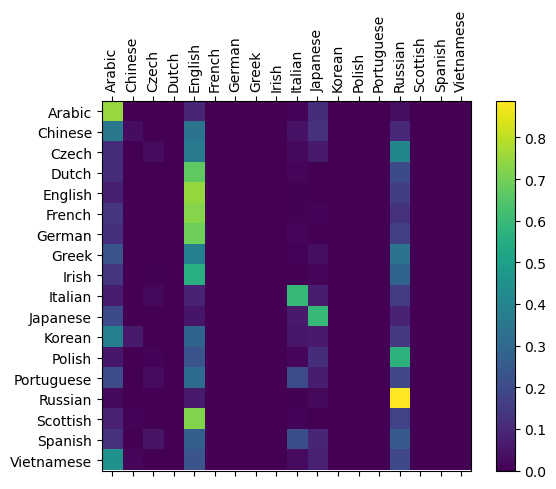

In [3]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

#n_hidden = 128
n_hidden = 2
rnn = RNN(n_letters, n_hidden, n_categories)

# %% To run a step of this network we need to pass an input (in our case, the
# Tensor for the current letter) and a previous hidden state (which we
# initialize as zeros at first). We'll get back the output (probability of
# each language) and a next hidden state (which we keep for the next
# step).

input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(input, hidden)

# For the sake of efficiency we don't want to be creating a new Tensor for
# every step, so we will use ``nameToTensor`` instead of
# ``letterToTensor`` and use slices. This could be further optimized by
# pre-computing batches of Tensors.
# 

input = nameToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

# As you can see the output is a ``<1 x n_categories>`` Tensor, where
# every item is the likelihood of that category (higher is more likely).
# 

# %% Training
# ========
# Preparing for Training
# ----------------------
# 
# Before going into training we should make a few helper functions. The
# first is to interpret the output of the network, which we know to be a
# likelihood of each category. We can use ``Tensor.topk`` to get the index
# of the greatest value:
# 

def categoryFromOutput(output):
    # compute max
    top_n, top_i = output.topk(1)
    # output index of max
    category_i = top_i.item()
    return languages[category_i], category_i

print(categoryFromOutput(output))

# We will also want a quick way to get a training example (a name and its
# language):
# 
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(languages)
    name = randomChoice(names[category])
    category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return category, name, category_tensor, name_tensor

for i in range(10):
    category, name, category_tensor, name_tensor = randomTrainingExample()
    print('category =', category, '/ name =', name)

# %% Training the Network
# --------------------
# 
# Now all it takes to train the network is show it a bunch of examples,
# have it make guesses, and compare its output against labels.
# 
# For the loss function ``nn.NLLLoss`` is appropriate, since the last
# layer of the RNN is ``nn.LogSoftmax``.
# 
criterion = nn.NLLLoss()

# Each loop of training will:
# 
# -  Create input and target tensors
# -  Create a zeroed initial hidden state
# -  Read each letter in and
# 
#    -  Keep hidden state for next letter
# 
# -  Compare final output to target
# -  Back-propagate
# -  Return the output and loss
# 

learning_rate = 0.005 # For this example, we keep the learning rate fixed

def train(category_tensor, name_tensor):
    # initialize hidden state - do this every time before passing an input sequence
    hidden = rnn.initHidden()
    # reset grad counters - do this every time after backprop
    rnn.zero_grad()
    # manually go through each element in input sequence
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
    # backpropagate based on loss at last element only
    loss = criterion(output, category_tensor)
    loss.backward()

    # Update network parameters
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

# Now we just have to run that with a bunch of examples. Since the
# ``train`` function returns both the output and loss we can print its
# guesses and also keep track of loss for plotting. Since there are 1000s
# of examples we print only every ``print_every`` examples, and take an
# average of the loss.
# 
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of loss for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

tuple_name_category=[] #Empty tuple

for i in languages:
    for j in names[i]:
        tuple_name_category.append((j, i))
        #print('Tuple: ', tuple_name_category)
        # Appending into empty tuple
        
count=0
#for iter in range(1, n_iters + 1):
for i in range(5):
    random.shuffle(tuple_name_category) #Shuffle is used for selecting randomly and non repeating elements.
    for name, category in tuple_name_category:
        count+=1
        category_tensor = torch.tensor([languages.index(category)], dtype=torch.long) #Construct tensor
        name_tensor = nameToTensor(name)
        #print('Name: ', name_tensor)
        #category, name, category_tensor, name_tensor = randomTrainingExample()
        
        #As it is
        
        output, loss = train(category_tensor, name_tensor)
        current_loss += loss

        # Print iter number, loss, name and guess
        if count % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (count, count / n_iters * 100, timeSince(start), loss, name, guess, correct))

        # Add current loss avg to list of losses
        if count % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0
    
    

# Plotting the Results
# --------------------
# 
# Plotting the historical loss from ``all_losses`` shows the network
# learning:
#

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


# Evaluating the Results
# ======================
# 
# To see how well the network performs on different categories, we will
# create a confusion matrix, indicating for every actual language (rows)
# which language the network guesses (columns). To calculate the confusion
# matrix a bunch of samples are run through the network with
# ``evaluate()``, which is the same as ``train()`` minus the backprop.
# 

# In[14]:

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
# n_confusion = 20000

# return an output given an input name
def evaluate(name_tensor):
    hidden = rnn.initHidden()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
# for i in range(n_confusion):
for i in languages:
    for j in names[i]:
        #category, name, category_tensor, name_tensor = randomTrainingExample()
        category_tensor = torch.tensor([languages.index(i)], dtype=torch.long) # Construct tensor
        name_tensor = nameToTensor(j)
        # As it is
        output = evaluate(name_tensor)
        guess, guess_i = categoryFromOutput(output)
        category_i = languages.index(i)
        confusion[category_i][guess_i] += 1


    
accuracy = sum(confusion.diag())/sum(sum(confusion))
print('Accuracy is %f' % accuracy.item())

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + languages, rotation=90)
ax.set_yticklabels([''] + languages)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()



# Hidden Layer = 8

tensor([[-2.9979, -2.7570, -2.8699, -2.9263, -2.9268, -3.0255, -2.9792, -3.0046,
         -2.9671, -2.9668, -2.8527, -3.0614, -2.6868, -2.8922, -2.8840, -2.6916,
         -2.8631, -2.7793]], grad_fn=<LogSoftmaxBackward0>)
('Polish', 12)
category = Scottish / name = Fraser
category = Italian / name = Abandonato
category = Spanish / name = Tosell
category = Spanish / name = Ventura
category = Dutch / name = See
category = Japanese / name = Shiomi
category = Spanish / name = Huerta
category = Portuguese / name = Ferro
category = Polish / name = Fabian
category = Scottish / name = Williamson
5000 5% (0m 5s) 1.5560 Lawson / Russian ✗ (English)
10000 10% (0m 10s) 2.4946 Meier / English ✗ (German)
15000 15% (0m 16s) 0.8202 Turbin / Russian ✓
20000 20% (0m 21s) 0.1219 Zhegulin / Russian ✓
25000 25% (0m 26s) 0.1417 Yujalin / Russian ✓
30000 30% (0m 31s) 1.9260 Takenouchi / Italian ✗ (Japanese)
35000 35% (0m 37s) 0.0043 Hizhnyakov / Russian ✓
40000 40% (0m 42s) 0.0452 V'Yuhin / Russian ✓
45000 4

C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\925805631.py:266: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + languages, rotation=90)
C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\925805631.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + languages)


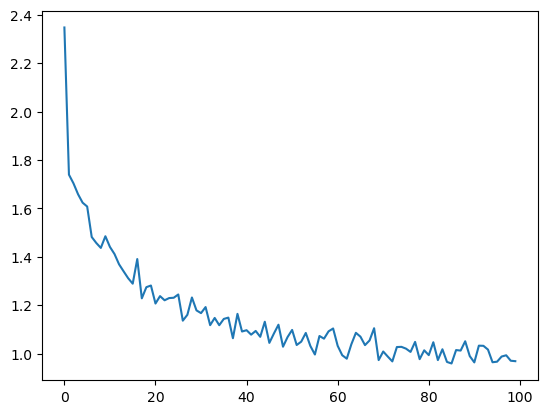

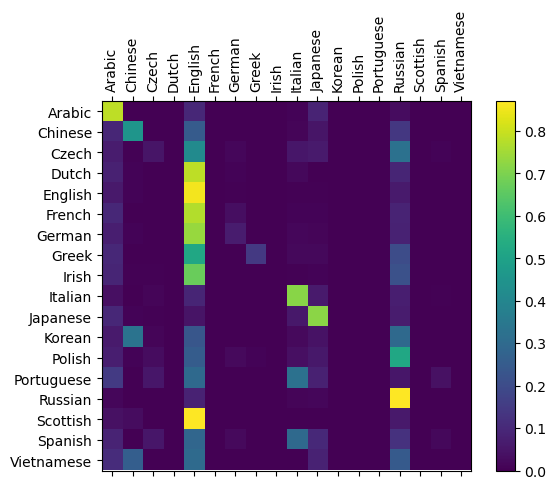

In [6]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

#n_hidden = 128
n_hidden = 8
rnn = RNN(n_letters, n_hidden, n_categories)

# %% To run a step of this network we need to pass an input (in our case, the
# Tensor for the current letter) and a previous hidden state (which we
# initialize as zeros at first). We'll get back the output (probability of
# each language) and a next hidden state (which we keep for the next
# step).

input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(input, hidden)

# For the sake of efficiency we don't want to be creating a new Tensor for
# every step, so we will use ``nameToTensor`` instead of
# ``letterToTensor`` and use slices. This could be further optimized by
# pre-computing batches of Tensors.
# 

input = nameToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

# As you can see the output is a ``<1 x n_categories>`` Tensor, where
# every item is the likelihood of that category (higher is more likely).
# 

# %% Training
# ========
# Preparing for Training
# ----------------------
# 
# Before going into training we should make a few helper functions. The
# first is to interpret the output of the network, which we know to be a
# likelihood of each category. We can use ``Tensor.topk`` to get the index
# of the greatest value:
# 

def categoryFromOutput(output):
    # compute max
    top_n, top_i = output.topk(1)
    # output index of max
    category_i = top_i.item()
    return languages[category_i], category_i

print(categoryFromOutput(output))

# We will also want a quick way to get a training example (a name and its
# language):
# 
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(languages)
    name = randomChoice(names[category])
    category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return category, name, category_tensor, name_tensor

for i in range(10):
    category, name, category_tensor, name_tensor = randomTrainingExample()
    print('category =', category, '/ name =', name)

# %% Training the Network
# --------------------
# 
# Now all it takes to train the network is show it a bunch of examples,
# have it make guesses, and compare its output against labels.
# 
# For the loss function ``nn.NLLLoss`` is appropriate, since the last
# layer of the RNN is ``nn.LogSoftmax``.
# 
criterion = nn.NLLLoss()

# Each loop of training will:
# 
# -  Create input and target tensors
# -  Create a zeroed initial hidden state
# -  Read each letter in and
# 
#    -  Keep hidden state for next letter
# 
# -  Compare final output to target
# -  Back-propagate
# -  Return the output and loss
# 

learning_rate = 0.005 # For this example, we keep the learning rate fixed

def train(category_tensor, name_tensor):
    # initialize hidden state - do this every time before passing an input sequence
    hidden = rnn.initHidden()
    # reset grad counters - do this every time after backprop
    rnn.zero_grad()
    # manually go through each element in input sequence
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
    # backpropagate based on loss at last element only
    loss = criterion(output, category_tensor)
    loss.backward()

    # Update network parameters
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

# Now we just have to run that with a bunch of examples. Since the
# ``train`` function returns both the output and loss we can print its
# guesses and also keep track of loss for plotting. Since there are 1000s
# of examples we print only every ``print_every`` examples, and take an
# average of the loss.
# 
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of loss for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

tuple_name_category=[] #Empty tuple

for i in languages:
    for j in names[i]:
        tuple_name_category.append((j, i))
        #print('Tuple: ', tuple_name_category)
        # Appending into empty tuple
        
count=0
#for iter in range(1, n_iters + 1):
for i in range(5):
    random.shuffle(tuple_name_category) #Shuffle is used for selecting randomly and non repeating elements.
    for name, category in tuple_name_category:
        count+=1
        category_tensor = torch.tensor([languages.index(category)], dtype=torch.long) #Construct tensor
        name_tensor = nameToTensor(name)
        #print('Name: ', name_tensor)
        #category, name, category_tensor, name_tensor = randomTrainingExample()
        
        #As it is
        
        output, loss = train(category_tensor, name_tensor)
        current_loss += loss

        # Print iter number, loss, name and guess
        if count % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (count, count / n_iters * 100, timeSince(start), loss, name, guess, correct))

        # Add current loss avg to list of losses
        if count % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0
    
    

# Plotting the Results
# --------------------
# 
# Plotting the historical loss from ``all_losses`` shows the network
# learning:
#

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


# Evaluating the Results
# ======================
# 
# To see how well the network performs on different categories, we will
# create a confusion matrix, indicating for every actual language (rows)
# which language the network guesses (columns). To calculate the confusion
# matrix a bunch of samples are run through the network with
# ``evaluate()``, which is the same as ``train()`` minus the backprop.
# 

# In[14]:

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
# n_confusion = 20000

# return an output given an input name
def evaluate(name_tensor):
    hidden = rnn.initHidden()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
# for i in range(n_confusion):
for i in languages:
    for j in names[i]:
        #category, name, category_tensor, name_tensor = randomTrainingExample()
        category_tensor = torch.tensor([languages.index(i)], dtype=torch.long) # Construct tensor
        name_tensor = nameToTensor(j)
        # As it is
        output = evaluate(name_tensor)
        guess, guess_i = categoryFromOutput(output)
        category_i = languages.index(i)
        confusion[category_i][guess_i] += 1


    
accuracy = sum(confusion.diag())/sum(sum(confusion))
print('Accuracy is %f' % accuracy.item())

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + languages, rotation=90)
ax.set_yticklabels([''] + languages)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()



# Hidden Layer = 32

tensor([[-2.9124, -2.9369, -2.9992, -2.8221, -3.0042, -2.6797, -2.9126, -2.7773,
         -2.9310, -2.9241, -2.9964, -2.7962, -2.8765, -2.8002, -2.9211, -2.8341,
         -3.0346, -2.9438]], grad_fn=<LogSoftmaxBackward0>)
('French', 5)
category = Italian / name = De felice
category = Japanese / name = Nataga
category = Spanish / name = Roldan
category = French / name = Richelieu
category = Japanese / name = Uehara
category = Dutch / name = Amersvoort
category = Korean / name = Jang
category = Korean / name = Lee
category = English / name = Ramsden
category = Scottish / name = Jackson
5000 5% (0m 5s) 0.1804 Tzallagov / Russian ✓
10000 10% (0m 10s) 0.2790 Saigutin / Russian ✓
15000 15% (0m 15s) 1.8583 Qureshi / English ✗ (Arabic)
20000 20% (0m 21s) 3.5258 Schenck / English ✗ (Dutch)
25000 25% (0m 26s) 0.4211 Healy / English ✓
30000 30% (0m 32s) 0.0545 Dakhaev / Russian ✓
35000 35% (0m 37s) 0.0201 Jidilev / Russian ✓
40000 40% (0m 43s) 0.3354 Fukusaku / Japanese ✓
45000 45% (0m 48s) 0.011

C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\1510036855.py:266: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + languages, rotation=90)
C:\Users\aradh\AppData\Local\Temp\ipykernel_44756\1510036855.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + languages)


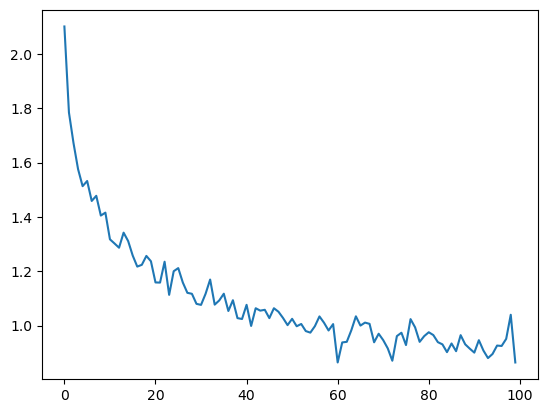

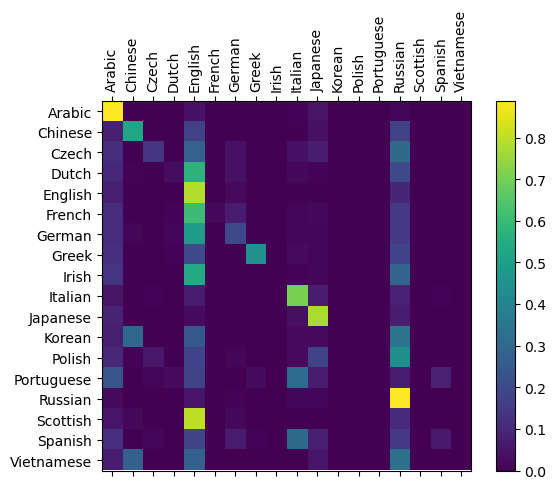

In [9]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

#n_hidden = 128
n_hidden = 32
rnn = RNN(n_letters, n_hidden, n_categories)

# %% To run a step of this network we need to pass an input (in our case, the
# Tensor for the current letter) and a previous hidden state (which we
# initialize as zeros at first). We'll get back the output (probability of
# each language) and a next hidden state (which we keep for the next
# step).

input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(input, hidden)

# For the sake of efficiency we don't want to be creating a new Tensor for
# every step, so we will use ``nameToTensor`` instead of
# ``letterToTensor`` and use slices. This could be further optimized by
# pre-computing batches of Tensors.
# 

input = nameToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

# As you can see the output is a ``<1 x n_categories>`` Tensor, where
# every item is the likelihood of that category (higher is more likely).
# 

# %% Training
# ========
# Preparing for Training
# ----------------------
# 
# Before going into training we should make a few helper functions. The
# first is to interpret the output of the network, which we know to be a
# likelihood of each category. We can use ``Tensor.topk`` to get the index
# of the greatest value:
# 

def categoryFromOutput(output):
    # compute max
    top_n, top_i = output.topk(1)
    # output index of max
    category_i = top_i.item()
    return languages[category_i], category_i

print(categoryFromOutput(output))

# We will also want a quick way to get a training example (a name and its
# language):
# 
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(languages)
    name = randomChoice(names[category])
    category_tensor = torch.tensor([languages.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return category, name, category_tensor, name_tensor

for i in range(10):
    category, name, category_tensor, name_tensor = randomTrainingExample()
    print('category =', category, '/ name =', name)

# %% Training the Network
# --------------------
# 
# Now all it takes to train the network is show it a bunch of examples,
# have it make guesses, and compare its output against labels.
# 
# For the loss function ``nn.NLLLoss`` is appropriate, since the last
# layer of the RNN is ``nn.LogSoftmax``.
# 
criterion = nn.NLLLoss()

# Each loop of training will:
# 
# -  Create input and target tensors
# -  Create a zeroed initial hidden state
# -  Read each letter in and
# 
#    -  Keep hidden state for next letter
# 
# -  Compare final output to target
# -  Back-propagate
# -  Return the output and loss
# 

learning_rate = 0.005 # For this example, we keep the learning rate fixed

def train(category_tensor, name_tensor):
    # initialize hidden state - do this every time before passing an input sequence
    hidden = rnn.initHidden()
    # reset grad counters - do this every time after backprop
    rnn.zero_grad()
    # manually go through each element in input sequence
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
    # backpropagate based on loss at last element only
    loss = criterion(output, category_tensor)
    loss.backward()

    # Update network parameters
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

# Now we just have to run that with a bunch of examples. Since the
# ``train`` function returns both the output and loss we can print its
# guesses and also keep track of loss for plotting. Since there are 1000s
# of examples we print only every ``print_every`` examples, and take an
# average of the loss.
# 
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of loss for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

tuple_name_category=[] #Empty tuple

for i in languages:
    for j in names[i]:
        tuple_name_category.append((j, i))
        #print('Tuple: ', tuple_name_category)
        # Appending into empty tuple
        
count=0
#for iter in range(1, n_iters + 1):
for i in range(5):
    random.shuffle(tuple_name_category) #Shuffle is used for selecting randomly and non repeating elements.
    for name, category in tuple_name_category:
        count+=1
        category_tensor = torch.tensor([languages.index(category)], dtype=torch.long) #Construct tensor
        name_tensor = nameToTensor(name)
        #print('Name: ', name_tensor)
        #category, name, category_tensor, name_tensor = randomTrainingExample()
        
        #As it is
        
        output, loss = train(category_tensor, name_tensor)
        current_loss += loss

        # Print iter number, loss, name and guess
        if count % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (count, count / n_iters * 100, timeSince(start), loss, name, guess, correct))

        # Add current loss avg to list of losses
        if count % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0
    
    

# Plotting the Results
# --------------------
# 
# Plotting the historical loss from ``all_losses`` shows the network
# learning:
#

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


# Evaluating the Results
# ======================
# 
# To see how well the network performs on different categories, we will
# create a confusion matrix, indicating for every actual language (rows)
# which language the network guesses (columns). To calculate the confusion
# matrix a bunch of samples are run through the network with
# ``evaluate()``, which is the same as ``train()`` minus the backprop.
# 

# In[14]:

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
# n_confusion = 20000

# return an output given an input name
def evaluate(name_tensor):
    hidden = rnn.initHidden()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
# for i in range(n_confusion):
for i in languages:
    for j in names[i]:
        #category, name, category_tensor, name_tensor = randomTrainingExample()
        category_tensor = torch.tensor([languages.index(i)], dtype=torch.long) # Construct tensor
        name_tensor = nameToTensor(j)
        # As it is
        output = evaluate(name_tensor)
        guess, guess_i = categoryFromOutput(output)
        category_i = languages.index(i)
        confusion[category_i][guess_i] += 1


    
accuracy = sum(confusion.diag())/sum(sum(confusion))
print('Accuracy is %f' % accuracy.item())

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + languages, rotation=90)
ax.set_yticklabels([''] + languages)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

